Linear Method

## Commentaires et communication entre nous:

J'ai changé l'évalution des erreurs, j'avais calculé des MSE en général, mais sur kaggle on sera évalués sur la RMSE, ça change presque rien mais comme ça c'est pareil. Parfait, merci

In [2]:
data <- read.csv(file.path("..", "data", "training_data.csv"))
data<-data[,-which(names(data) %in% c("SWEETORSOUR"))] #to remove the SWEETORSOUR response variable
dim(data)
data$Intensity<-as.numeric(as.factor(data$Intensity)) #more efficient, this way we only have one column with 2=high, 1=low
data<-data[ , which(apply(data, 2, var) != 0)] #remove all columns with variance=0 (1842 columns)
dim(data)

[1]  708 4871

[1]  708 3029

In [3]:
set.seed(199)
idx.train <- sample(nrow(data), nrow(data)/2)
data.train <- data[idx.train,]
data.test <- data[-idx.train,]

In [4]:
#data.train
data.train.y<-data.train$VALENCE.PLEASANTNESS
data.train.x<-data.train[,-(which(names(data.train) %in% c("VALENCE.PLEASANTNESS")))]
#var0.train <- which(apply(data.train.x, 2, var) != 0) maybe avoid removing new colomns otherwise risk of not having the same columns in training and test set
#data.train.x <- data.train.x[,var0.train]
data.train.x.matrix<- as.matrix(data.train.x) #useful for some methods

#data.test
data.test.x<-data.test[,-which(names(data.test) %in% c("VALENCE.PLEASANTNESS"))]
#var0.test <- which(apply(data.test.x, 2, var) != 0)
#data.test.x <- data.test[,var0.test]
data.test.x.matrix<- as.matrix((model.matrix(~.-1, data.test.x)))
data.test.y<-data.test$VALENCE.PLEASANTNESS

In [5]:
datac <- data[,-which(names(data) %in% c("VALENCE.PLEASANTNESS"))]
datac$Intensity<-as.numeric(as.factor(datac$Intensity))
datac<-datac[ , which(apply(datac, 2, var) != 0)] 
cor_matrix <- cor(datac)
n = 0
cor_i <- c()
cor_j <- c()
for(i in 1:nrow(cor_matrix)) {
    for(j in 1:i) #because the correlation matrix is symetric
        if(i != j) {
            if(cor_matrix[i,j] == 1) {
                n = n + 1
                cor_i <- c(cor_i,i)
                cor_j <- c(cor_j,j)
            }   
        }          
}

cor_i <- c(cor_i,0)
filtered_cor_i <- c()
for(i in 1:n) {
    if(cor_i[i] != cor_i[i+1]) filtered_cor_i <- c(filtered_cor_i,cor_i[i])
}
filtered_data <- datac
filtered_data <- filtered_data[,-filtered_cor_i]


set.seed(199)
filtered_data$VALENCE.PLEASANTNESS <- data$VALENCE.PLEASANTNESS
idx.train <- sample(nrow(data), nrow(data)/2)
filtered.data.train <- filtered_data[idx.train,]
filtered.data.test <- filtered_data[-idx.train,]
f.data.train.y<-filtered.data.train$VALENCE.PLEASANTNESS
f.data.train.x<-filtered.data.train[,-which(names(filtered.data.train) %in% c("VALENCE.PLEASANTNESS"))]
f.data.train.x.matrix<- as.matrix(f.data.train.x) 

f.data.test.y<-filtered.data.test$VALENCE.PLEASANTNESS
f.data.test.x<-filtered.data.test[,-which(names(filtered.data.test) %in% c("VALENCE.PLEASANTNESS"))]
f.data.test.x.matrix<- as.matrix((model.matrix(~.-1, f.data.test.x)))

In [50]:
table(apply(cor_matrix, 2, function(x) x%in%1.00))


  FALSE    TRUE 
9165052    3732 

In [10]:
table(is.na(filtered_data))


  FALSE 
2040456 

In [17]:
#Linear regression on the data set with the test and training errors

set.seed(199)

lm.fit <- lm(VALENCE.PLEASANTNESS ~ ., filtered.data.train)
RSS = sum((data.test$VALENCE.PLEASANTNESS - predict(lm.fit, filtered_data))^2)
RSS

RMSE=sqrt(mean((data.test$VALENCE.PLEASANTNESS - predict(lm.fit, filtered.data.test))^2))
print(RMSE)

summary(lm.fit)

#quality.of.fit <- function(fit, data) {
#    RSS <- sum((data$VALENCE.PLEASANTNESS - predict(fit, data))^2)
#    TSS <- sum((data$VALENCE.PLEASANTNESS - mean(data$VALENCE.PLEASANTNESS))^2)
#    cat(c("Residual standard error: ", sqrt(1/(nrow(data) - length(coefficients(fit))) * RSS), " R^2 = ", 1 - RSS/TSS, "\n")) }
#quality.of.fit(lm.fit, data.train)
#quality.of.fit(lm.fit, data.test)

#--> test RSS very high
#-->RMSE is 62719 as a baseline for comparison #but potentially some error

Warning message in predict.lm(lm.fit, filtered_data):
"prediction from a rank-deficient fit may be misleading"


[1] 1.392535e+12

Warning message in predict.lm(lm.fit, filtered.data.test):
"prediction from a rank-deficient fit may be misleading"


[1] 62719.42



Call:
lm(formula = VALENCE.PLEASANTNESS ~ ., data = filtered.data.train)

Residuals:
    Min      1Q  Median      3Q     Max 
-39.022  -1.907   0.000   1.522  46.652 

Coefficients: (2629 not defined because of singularities)
                         Estimate Std. Error t value Pr(>|t|)  
(Intercept)             1.119e+08  6.241e+07   1.793   0.0760 .
Intensity               2.044e+00  2.907e+00   0.703   0.4835  
complexity.from.pubmed -8.953e+01  4.345e+01  -2.061   0.0419 *
MW                     -2.843e+04  1.665e+04  -1.707   0.0908 .
AMW                    -4.267e+05  2.333e+05  -1.829   0.0703 .
Sv                      7.638e+06  4.219e+06   1.810   0.0732 .
Se                      7.733e+06  4.225e+06   1.831   0.0701 .
Sp                     -1.929e+06  1.056e+06  -1.827   0.0707 .
Si                      3.347e+06  1.865e+06   1.795   0.0756 .
Mv                      1.060e+07  5.811e+06   1.824   0.0712 .
Me                      3.446e+05  1.509e+05   2.284   0.0245 *
Mp   

In [14]:
lm.fit$rank

[1] 335

Warning message:
"package 'leaps' was built under R version 3.6.3"Warning message in leaps.setup(x, y, wt = wt, nbest = nbest, nvmax = nvmax, force.in = force.in, :
"4619  linear dependencies found"

Reordering variables and trying again:


[1] 0.06120547 0.10218147 0.14013607 0.17490099 0.19829864 0.22125544
 [7] 0.23970284 0.25567691 0.27179090 0.28863621 0.30113360 0.31331523
[13] 0.32639089 0.33934170 0.35277216 0.36688025 0.37615975 0.38347325
[19] 0.39322008 0.40096030 0.40879091 0.41691453 0.42307445 0.43050642
[25] 0.43814638 0.44573683 0.45482231 0.46007376 0.46709285 0.47644660
[31] 0.48451614 0.49197573 0.49908982 0.50697533 0.51269861 0.51841979
[37] 0.52348451 0.52802851 0.53271492 0.53748776 0.54126731

ERROR: Error in xy.coords(x, y): objet 'regfit.fwd.summary' introuvable


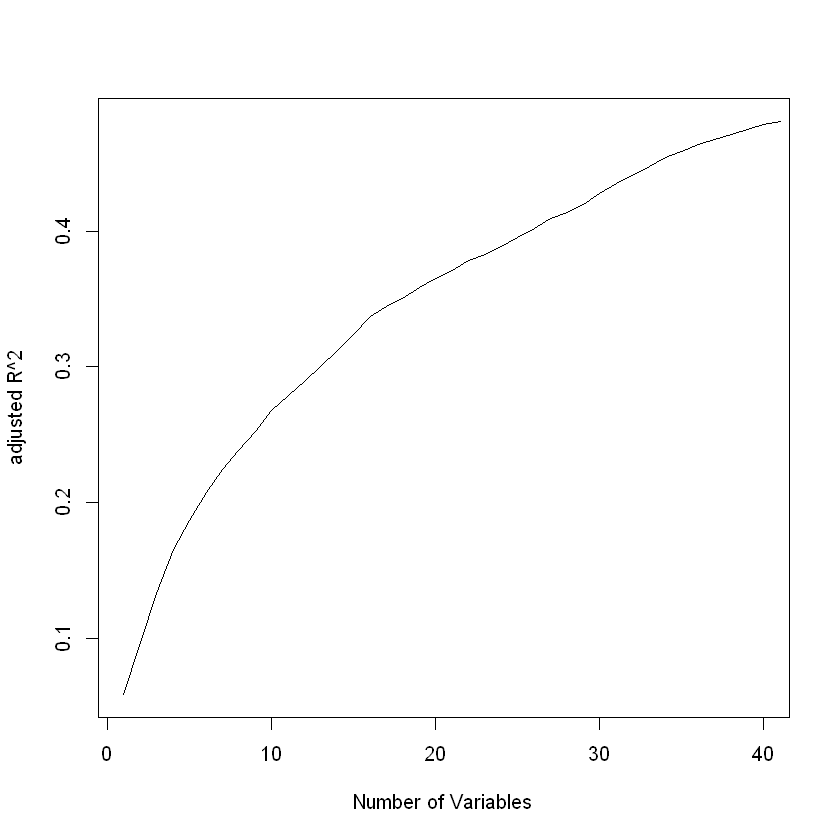

In [32]:
#Foreward selection without cross validation

library(leaps)
nvmax = 40 # Which nmax ? with 40 ~10min to run
reg.fit <- regsubsets(VALENCE.PLEASANTNESS~., data.train, really.big = T, method = 'forward', nvmax = nvmax) 
regfit.summary <- summary(reg.fit)
summary(reg.fit)$rsq

plot(regfit.summary$adjr2, type = "l", xlim = c(1,nvmax), xlab = "Number of Variables", ylab = "adjusted R^2")
adjr2.max <- which.max(regfit.summary$adjr2)
points(adjr2.max, regfit.fwd.summary$adjr2[adjr2.max], col = "red", cex = 2, pch = 20)

#--> The adjusted R^2 increase with the nb of variables
#--> But : R^2 adjusted is not appropriate in high dimensions : R^2 adjusted = 1 if RSS = 0
#--> Better to mix forward selection with cross validation

In [10]:
#Cross-validation with on each fold foreward selection --> a ne pas garder a cause des linear dependencies

#install.packages('tidymodels')
library(leaps)
library(tidymodels)

predict.regsubsets <- function(object, newdata, id, form = as.formula(object$call[[2]])) {
    mat = model.matrix(form, newdata)
    coefi = coef(object, id=id)
    xvars = names(coefi)
    mat[,xvars]%*%coefi
}

evaluate <- function(fold, fit, formula = VALENCE.PLEASANTNESS ~ .) {
    valid.set <- assessment(fold)
    sapply(seq(1, fit$nvmax - 1),
           function(id) mean((valid.set$VALENCE.PLEASANTNESS - predict(fit, valid.set, id, formula))^2))
}
           
validation_data <- vfold_cv(filtered.data.train, v = 5)
fit_and_evaluate <- function(fold, formula = VALENCE.PLEASANTNESS ~ .) {
    fit <- regsubsets(formula, analysis(fold), method = "forward", nvmax = 30)
    evaluate(fold, fit)
}
           
cv.errors <- sapply(validation_data$splits, fit_and_evaluate)
mean.cv.errors <- rowMeans(cv.errors)
           
#Long à compiler genre env 20-30min
#peut etre à essayer avec d'autre v ou nvmax

Warning message in leaps.setup(x, y, wt = wt, nbest = nbest, nvmax = nvmax, force.in = force.in, :
“2666  linear dependencies found”

Reordering variables and trying again:


Warning message in leaps.setup(x, y, wt = wt, nbest = nbest, nvmax = nvmax, force.in = force.in, :
“2664  linear dependencies found”

Reordering variables and trying again:


Warning message in leaps.setup(x, y, wt = wt, nbest = nbest, nvmax = nvmax, force.in = force.in, :
“2662  linear dependencies found”

Reordering variables and trying again:


Warning message in leaps.setup(x, y, wt = wt, nbest = nbest, nvmax = nvmax, force.in = force.in, :
“2662  linear dependencies found”

Reordering variables and trying again:


Warning message in leaps.setup(x, y, wt = wt, nbest = nbest, nvmax = nvmax, force.in = force.in, :
“2664  linear dependencies found”

Reordering variables and trying again:


475.6237,534.5281,591.3750,445.5185,595.7780
483.8212,553.1420,573.3426,441.9789,603.8234
470.3109,533.9315,557.4054,445.2808,579.6635
458.2269,506.5426,557.0520,437.1216,573.5884
421.3286,504.4459,558.4996,448.0889,580.0857
402.0673,525.5716,554.3610,431.9322,579.2968
406.4979,518.8017,543.4862,425.6350,559.8798
414.1889,535.9558,530.8341,413.7288,574.8729
404.0203,539.6585,525.9302,432.3037,588.1381
412.2119,544.3065,527.4625,430.7358,580.9671
411.5255,539.9099,539.1201,432.7625,587.1989


[1] 528.5647 531.2216 517.3184 506.5063 502.4897 498.6458 490.8601 493.9161
 [9] 498.0102 499.1368 502.1034 501.5692 504.0085 512.2375 528.3150 532.0974
[17] 531.6066 539.3419 544.5624 549.7021 553.3806 558.7811 559.6011 558.3041
[25] 561.0020 562.0201 572.8948 569.1477 568.7314 581.4258 581.3331

[1] 7

[1] 490.8601

[1] "RMSE cv min : 22.1553631685622"


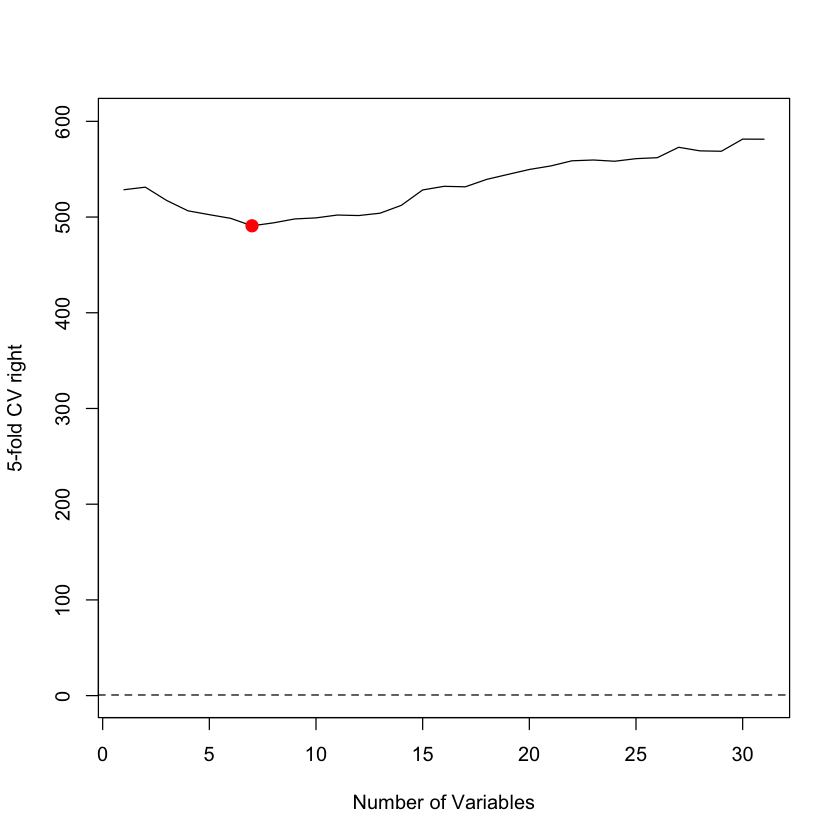

In [47]:
cv.errors
mean.cv.errors           
plot(mean.cv.errors, type = "l", ylim = c(1, 600), xlab = "Number of Variables", ylab = "5-fold CV right")
cv.min = which.min(mean.cv.errors)
cv.min #11
mean.cv.errors[cv.min] #297.123
points(cv.min, mean.cv.errors[cv.min], col = "red", cex = 2, pch = 20)
abline(sd(data$Y), 0, lty = "dashed")

print(paste0('RMSE cv min : ', sqrt(mean.cv.errors[cv.min])))
#--> The errors are very high around 300 : the min error = 297 with cv min =11
#--> I think with a higher nvmax it should give a better error but it will take higher amount of time to run 

[1] 19.30019

[1] 22.57012

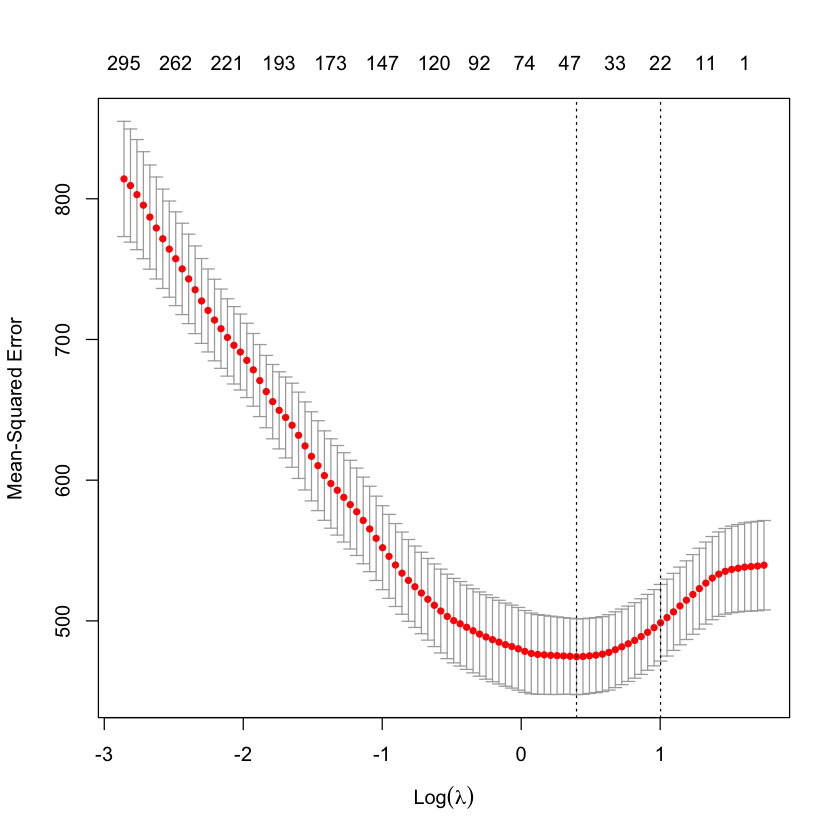

In [24]:
#Cross-validation Lasso 
set.seed(12)
#install.packages('glmnet')
library(glmnet)

#cross-validation lasso on training set
cv.lasso <- cv.glmnet(data.train.x.matrix, data.train.y, alpha = 1)
plot(cv.lasso)
best.lasso <- glmnet(data.train.x.matrix, data.train.y, alpha = 1, lambda = cv.lasso$lambda.min)
coeffs<-coef(best.lasso)

y<-predict(best.lasso,data.train.x.matrix)
RMSE.train=sqrt(mean((y-data.train.y)**2))
RMSE.train

y<-predict(best.lasso, data.test.x.matrix)
RMSE.test=sqrt(mean((y-data.test.y)**2))
RMSE.test

In [18]:
#Cross-validation Lasso with filtered data
set.seed(12)
#install.packages('glmnet')
library(glmnet)

#cross-validation lasso on training set
cv.lasso <- cv.glmnet(f.data.train.x.matrix, f.data.train.y, alpha = 1)
#plot(cv.lasso)
best.lasso <- glmnet(f.data.train.x.matrix, f.data.train.y, alpha = 1, lambda = cv.lasso$lambda.min)
coeffs<-coef(best.lasso)
#best number of predictors is always changing if the seed is not set??

y<-predict(best.lasso,f.data.train.x.matrix)
RMSE.train=sqrt(mean((y-f.data.train.y)**2))
print(paste0("RMSE for training set: ",RMSE.train))

#test lasso regularization on test set
y<-predict(best.lasso, f.data.test.x.matrix)
RMSE.test=sqrt(mean((y-f.data.test.y)**2))
print(paste0("RMSE for test set: ",RMSE.test))

[1] "RMSE for training set: 19.3001773763237"
[1] "RMSE for test set: 22.5702763766353"


[1] "RMSE for training set: 18.7726252859476"
[1] "RMSE for test set: 22.5009722975498"


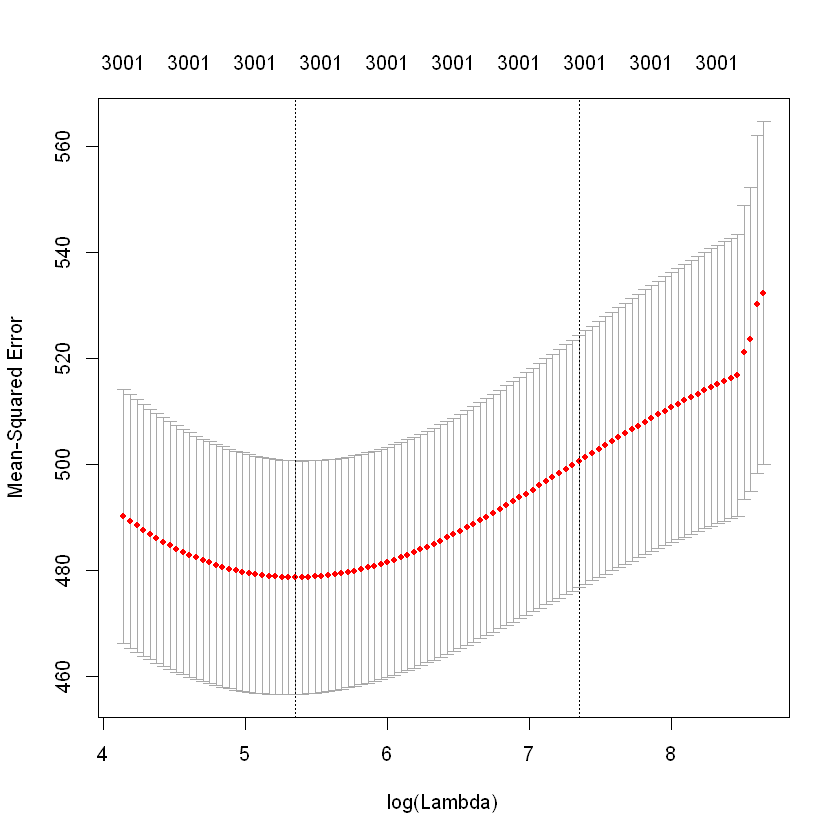

In [19]:
#Same process using Ridge regularization
set.seed(12)

#cross-validation ridge on training set
cv.ridge <- cv.glmnet(data.train.x.matrix, data.train.y, alpha = 0)
plot(cv.ridge)
best.ridge <- glmnet(data.train.x.matrix, data.train.y, alpha = 0, lambda = cv.ridge$lambda.min)
coeffs<-coef(best.ridge)

#use model on training data set
y<-predict(best.ridge,data.train.x.matrix)
RMSE.train=sqrt(mean((y-data.train.y)**2))
print(paste0("RMSE for training set: ",RMSE.train))

#test ridge regularization on test set
y<-predict(best.ridge, data.test.x.matrix)
RMSE.test=sqrt(mean((y-data.test.y)**2))

print(paste0("RMSE for test set: ",RMSE.test))

In [20]:
#Same process using Ridge regularization with filtered data
set.seed(12)

#cross-validation ridge on training set
cv.ridge <- cv.glmnet(f.data.train.x.matrix, f.data.train.y, alpha = 0)
#plot(cv.ridge)
best.ridge <- glmnet(f.data.train.x.matrix, f.data.train.y, alpha = 0, lambda = cv.ridge$lambda.min)
coeffs<-coef(best.ridge)

#use model on training data set
y<-predict(best.ridge,f.data.train.x.matrix)
RMSE.train=sqrt(mean((y-f.data.train.y)**2))
print(paste0("RMSE for training set: ",RMSE.train))

#test ridge regularization on test set
y<-predict(best.ridge, f.data.test.x.matrix)
RMSE.test=sqrt(mean((y-f.data.test.y)**2))
print(paste0("RMSE for test set: ",RMSE.test))

[1] "RMSE for training set: 18.8032639591266"
[1] "RMSE for test set: 22.5070800635539"


In [ ]:
## --> the filtered data increase a little the errors

In [27]:
## The results are better with lasso regularization and we will choose lasso regularization with the bootstrap approach.
#actually without variance 0 cols, better with ridge

In [131]:
#The data might have confounder effect, we are going to try using bootstrap data sets

bootstrap<-function(data) data[sample(nrow(data),nrow(data),replace=T),]

fitted.coefficients.lasso <- function(data){
    #prepare data
    datax<-as.matrix(data[,-which(names(data) %in% c("VALENCE.PLEASANTNESS"))])
    #datax<- model.matrix(~.-1, datax)
    datay<-data$VALENCE.PLEASANTNESS

    cv.lasso <- cv.glmnet(datax, datay, alpha = 0) #0 is ridge, have to change the name of the method
    best.lasso <- glmnet(datax, datay, alpha = 0, lambda = cv.lasso$lambda.min)
    return(as.matrix(coef(best.lasso)))
}

bias_input <- function(X) cbind(rep(1, ifelse(is.null(nrow(X)), length(X), nrow(X))), X)

B=6
summary_bootstrap_withplot<-function(B, data.boot){#if you want to check the number of bootstrap needed
    coeffs=c()
    data.train.prep<-bias_input(data.train.x.matrix)
    coeffs=cbind(coeffs, fitted.coefficients.lasso(bootstrap(data.boot)))
    y.pred<-data.train.prep%*%rowMeans(coeffs)
    RMSE_bootstrap<-sqrt(mean((y.pred-data.train.y)**2))
    plot(1,RMSE_bootstrap,xlim=c(1,B))
    for (i in 2:B){
       coeffs=cbind(coeffs, fitted.coefficients.lasso(bootstrap(data.boot)))
       y.pred<-data.train.prep%*%rowMeans(coeffs)
       RMSE_bootstrap<-sqrt(mean((y.pred-data.train.y)**2))
       points(i,RMSE_bootstrap)
    }
    return (rowMeans(coeffs))
}
summary_bootstrap<-function(B,data.boot){
    coeffs=c()
    for (i in 2:B){
       coeffs=cbind(coeffs, fitted.coefficients.lasso(bootstrap(data.boot)))
    }
    return (rowMeans(coeffs))
}
#summarize( #je n'ai pas encore réussi à faire une fonction correcte pour summarize..
#m<-replicate(B,fitted.coefficients.lasso(bootstrap(data.train)))
beta<-summary_bootstrap(B,data.train)

In [132]:
#beta<-rowMeans(m[[1]][],m[[2]][],m[[3]][],m[[4]][]) #permet de visualiser les résultats pour le bootstrap, il faudrait trouver une fonction pour les calculer

bias_input <- function(X) cbind(rep(1, ifelse(is.null(nrow(X)), length(X), nrow(X))), X)

#check before matrix mutliplication
#length(beta) print if you need
#preparation of train set to fit output form
data.train.prep<-bias_input(data.train.x.matrix) #add column of 1 for the intercept


#compute train error
y.pred<-data.train.prep%*%beta
RMSE_bootstrap.train<-sqrt(mean((y.pred-data.train.y)**2))
print(paste0("RMSE on the training data with bootstrap: ",RMSE_bootstrap.train))

#compute test error
data.test.prep<-bias_input(data.test.x.matrix) #add column of 1 for the intercept
y.test.pred<-data.test.prep%*%beta
RMSE_bootstrap.test<-sqrt(mean((y.test.pred-data.test.y)**2))
print(paste0("RMSE on the test data with lasso regularization and bootstrap: ",RMSE_bootstrap.test))

#résultats légèrement meilleurs que sans bootstrap sur le train set mais pas le test set
#meilleurs resultats avec ridge regulrization que lasso

[1] "RMSE on the training data with bootstrap: 18.6286989791377"
[1] "RMSE on the test data with lasso regularization and bootstrap: 22.9066964202227"


In [55]:
#Try GAM
library(mgcv)
data1x<-data.train[,-which(names(data.train) %in% c("VALENCE.PLEASANTNESS"))]

gam<-gam(formula=(VALENCE.PLEASANTNESS~s(data1x)), data=data.train, family="gaussian")


Loading required package: nlme
This is mgcv 1.8-28. For overview type 'help("mgcv-package")'.


ERROR: Error in model.frame.default(formula = VALENCE.PLEASANTNESS ~ 1 + data1x, : type (list) incorrect pour la variable 'data1x'


In [53]:
fit<- smooth.spline(data.train.x, data.train.y, lambda = 1e-2)

ERROR: Error in xy.coords(x, y, setLab = FALSE): 'x' and 'y' lengths differ


In [72]:
library(gam)
fitgl<-gam(VALENCE.PLEASANTNESS ~ .-VALENCE.PLEASANTNESS,data.train,family="gaussian")


In [73]:
y<-predict(fitgl, data.test)
sqrt(mean((y-data.test.y)^2))

Warning message in predict.lm(object, newdata, se.fit, scale = 1, type = if (type == :
"prediction from a rank-deficient fit may be misleading"

[1] 62719.43

## Pour toutes les cellules à éliminer que je garde dans le doute pour l'instant

In [15]:
                #data1 <- as.matrix(data_prepared) #--> Je n'arrive pas à changer les data en matrice pour pouvoir utiliser la regularization ??

                #-->Je ne sais pas si c'est la meilleure solution mais glmnet ne gère apparement pas les variables en catégories, il faut donc les remplacer par des dummy variables

                #filtre sur les données numériques pour ne pas prendre les columnes avec variance 0 et ne pas prendre la réponse, rend le calcul compliqué je ne sais pas si c'est nécessaire
                #cols = names(data.dummy[, sapply(data.dummy, function(v) var(v) != 0)]) #eliminate columns woth zero variance

                ##--> mieux de faire sur data.train? 
                #prepare dummy variables
data1x<-data.train[,-which(names(data.train) %in% c("VALENCE.PLEASANTNESS"))]
#levels(data1x$Intensity) <- c(1,0) #more efficient, this way we only have one column with 1=high, 0=low
#data1x<-as.matrix(data1x)
#data1x
#data1x <- model.matrix(~.-1, data1x)#creates dummy variables
data1y<-data.train$VALENCE.PLEASANTNESS

#prepare test data

data1x.test<-data.test[,-which(names(data.test) %in% c("VALENCE.PLEASANTNESS"))]
data1x.test<- model.matrix(~.-1, data1x.test)
data1y.test<-data.test$VALENCE.PLEASANTNESS
